In [1]:
#Original program by Joseph Lee Wei En
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)

import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print('The one hot label is:', y_train_one_hot[1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

x_train[0]


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#call an empty sequential model
model = Sequential()
#add first layer to model
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#flatten the cube format into one row
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

x_train shape: (50000, 32, 32, 3)
The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None

Epoch 1/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.5484 - accuracy: 0.4337 - val_loss: 1.2071 - val_accuracy: 0.5704
Epoch 2/20
1250/1250 [==============================] - 29s 23ms/step - loss: 1.1281 - accuracy: 0.5996 - val_loss: 0.9334 - val_accuracy: 0.6702
Epoch 3/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.9637 - accuracy: 0.6582 - val_loss: 0.8774 - val_accuracy: 0.6916
Epoch 4/20
1250/1250 [==============================] - 22s 18ms/step - loss: 0.8619 - accuracy: 0.6953 - val_loss: 0.7823 - val_accuracy: 0.7284
Epoch 5/20
1250/1250 [==============================] - 20s 16ms/step - loss: 0.7949 - accuracy: 0.7222 - val_loss: 0.7461 - val_accuracy: 0.7380
Epoch 6/20
1250/1250 [==============================] - 20s 16ms/step - loss: 0.7412 - accuracy: 0.7382 - val_loss: 0.7589 - val_accuracy: 0.7384
Epoch 7/20
1250/1250 [==============================] - 20s 16ms/step - loss: 0.6952 - accuracy: 0.7556 - val_loss: 0.7094 -

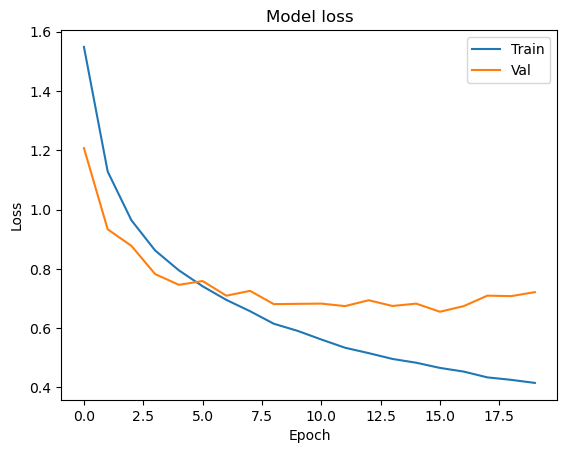

In [2]:
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

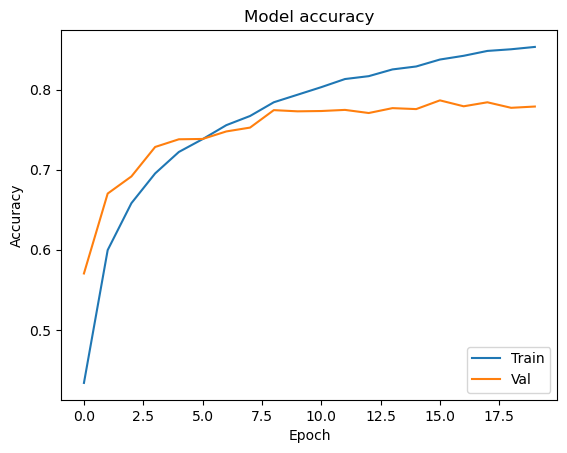

In [3]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()